In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = Path('./data')
trainfile = 'semeval2016-task6-trainingdata.txt'
testfile = 'SemEval2016-Task6-subtaskA-testdata.txt'

In [3]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [4]:
train = pd.read_csv(path/trainfile, delimiter='\t', header=0, encoding = "latin-1")

In [5]:
train['Tweet'] = train['Tweet'].apply(clean_ascii)

In [6]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
train.sample(n=8, random_state=137)

,ID,Target,Tweet,Stance
2522,2623,Legalization of Abortion,"on a side note, just because you think smtg is wrong, doesn't mean everyone else have to live accd to your beliefs.. ^^ #SemST",NONE
716,817,Climate Change is a Real Concern,"We need to work with confidence, transparence and guided by consensus @manupulgarvidal at @UN_PGA event on #action2015 #SemST",NONE
1741,1842,Hillary Clinton,If you're not watching @HillaryClinton's speech right now you're missing her drop tons of wisdom. #SemST,FAVOR
1007,1108,Feminist Movement,"The only reason, I stopped at each entrance in #walkingstreet is to have a #LawOfAttraction #viewpoint #dailydevotional #SemST",NONE
2747,2848,Legalization of Abortion,Murdering an unborn child is the crudest form of contraception! #Catholic #Christian #Conservative #feminist #SemST,AGAINST
2445,2546,Legalization of Abortion,Abortion is legal all nine months in Canada and in some parts of the USA. #ProLifeYouth #SemST,AGAINST
1620,1721,Hillary Clinton,Marriage equality a constitutional right! Woot #HRC2016 #hillaryclinton #readyforhillary #vote #hillaryfor2016 ##mpotus #SemST,FAVOR
2461,2562,Legalization of Abortion,"Why is bacteria considered life on Mars, but a heartbeat is not considered life on earth? #heartbeat #SemST",AGAINST


In [7]:
example = train['Tweet'][0]

In [8]:
wordcloud = WordCloud().generate(example)

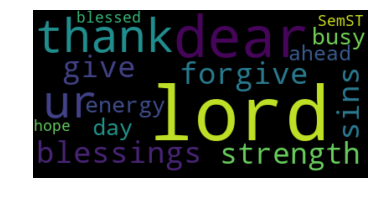

In [9]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
tweets = " ".join(tweet for tweet in train['Tweet'])
print("Obtained {} words from {} Tweets in the dataset".format(len(tweets), len(train['Tweet'])))

Obtained 307853 words from 2814 Tweets in the dataset


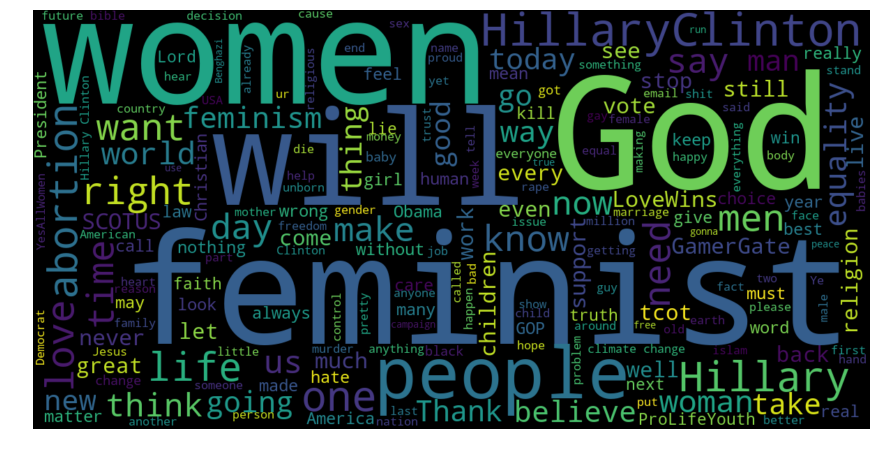

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["SemST", "RT"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width=1200, height=600,
                      background_color="black", normalize_plurals=True).generate(tweets)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
wordcloud.to_file('tweet_wordcloud.png')